In [ ]:
! pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 7.8 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
import pandas as pd #for manipulating and analysing data
import plotly.express as px #for vizualization
from prophet import Prophet #for forecasting

In [ ]:
#Initialize plotly
import plotly.io as pio
pio.renderers.default='colab'

Importing the dataset and exploring it

In [ ]:
#The dataset is from YahooFinance
df = pd.read_csv("TSLA.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-14,315.000000,322.136658,310.000000,319.503326,319.503326,70806300
1,2021-12-15,317.736664,326.250000,309.416656,325.329987,325.329987,75169200
2,2021-12-16,331.500000,331.660004,307.283325,308.973328,308.973328,82771500
3,2021-12-17,304.923340,320.220001,303.013336,310.856659,310.856659,100437300
4,2021-12-20,303.566681,307.230011,297.796661,299.980011,299.980011,56480100
...,...,...,...,...,...,...,...
247,2022-12-07,175.029999,179.380005,172.220001,174.039993,174.039993,84213300
248,2022-12-08,172.199997,175.199997,169.059998,173.440002,173.440002,97624500
249,2022-12-09,173.839996,182.500000,173.360001,179.050003,179.050003,104746600
250,2022-12-12,176.100006,177.369995,167.520004,167.820007,167.820007,109794500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,273.797711,280.519035,266.094881,273.012420,273.012420,8.216853e+07
std,52.273029,53.154954,51.162635,52.163296,52.163296,2.216152e+07
min,168.630005,170.919998,156.910004,160.949997,160.949997,4.073370e+07
25%,233.856666,239.542503,227.056664,233.069172,233.069172,6.658005e+07
50%,280.660004,285.396668,272.039994,279.431656,279.431656,8.008305e+07
75%,304.995010,313.207489,300.459991,307.416664,307.416664,9.468008e+07
max,396.516663,402.666656,378.679993,399.926666,399.926666,1.755367e+08


Data vizualization

In [ ]:
px.area(df, x="Date", y="Close") # by Close we mean the closest selling price

In [ ]:
px.line(df, x='Date', y='Close')

In [ ]:
px.area(df, x='Date', y='Volume') #By volume we mean the transaction volume = number of shares

In [ ]:
px.bar(df, y='Volume')

In [ ]:
#Let's explore statistical data
px.box(df, y='Close')

Data preparing and Modeling

Here we are using the open source Facebook prophet library. It is fast and accurate it geerates results very fast.
It is reliable because even Facebook use it for internal forecasting
It deals with the missing data and doesn't need data preprocessing.
(It is available in both R and Python) It is very good at detecting trends and seasonial influences in price

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-14,315.000000,322.136658,310.000000,319.503326,319.503326,70806300
1,2021-12-15,317.736664,326.250000,309.416656,325.329987,325.329987,75169200
2,2021-12-16,331.500000,331.660004,307.283325,308.973328,308.973328,82771500
3,2021-12-17,304.923340,320.220001,303.013336,310.856659,310.856659,100437300
4,2021-12-20,303.566681,307.230011,297.796661,299.980011,299.980011,56480100
...,...,...,...,...,...,...,...
247,2022-12-07,175.029999,179.380005,172.220001,174.039993,174.039993,84213300
248,2022-12-08,172.199997,175.199997,169.059998,173.440002,173.440002,97624500
249,2022-12-09,173.839996,182.500000,173.360001,179.050003,179.050003,104746600
250,2022-12-12,176.100006,177.369995,167.520004,167.820007,167.820007,109794500


In [ ]:
columns=['Date', 'Close']

In [ ]:
new_df = pd.DataFrame(data=df, columns=columns)

In [ ]:
new_df

,Date,Close
0,2021-12-14,319.503326
1,2021-12-15,325.329987
2,2021-12-16,308.973328
3,2021-12-17,310.856659
4,2021-12-20,299.980011
...,...,...
247,2022-12-07,174.039993
248,2022-12-08,173.440002
249,2022-12-09,179.050003
250,2022-12-12,167.820007


In [ ]:
prophet_df = new_df.rename(columns={"Date" : "ds", "Close" : "y"})

In [ ]:
prophet_df

,ds,y
0,2021-12-14,319.503326
1,2021-12-15,325.329987
2,2021-12-16,308.973328
3,2021-12-17,310.856659
4,2021-12-20,299.980011
...,...,...
247,2022-12-07,174.039993
248,2022-12-08,173.440002
249,2022-12-09,179.050003
250,2022-12-12,167.820007


In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5du926rc/dpquhpp7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5du926rc/iees3em2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52626', 'data', 'file=/tmp/tmp5du926rc/dpquhpp7.json', 'init=/tmp/tmp5du926rc/iees3em2.json', 'output', 'file=/tmp/tmp5du926rc/prophet_modelcz8e0y0h/prophet_model-20221214105004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:50:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:50:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-14,337.092188,301.510869,382.904683,337.092188,337.092188,3.506700,3.506700,3.506700,3.506700,3.506700,3.506700,0.0,0.0,0.0,340.598888
1,2021-12-15,336.672623,304.562527,379.237641,336.672623,336.672623,4.776024,4.776024,4.776024,4.776024,4.776024,4.776024,0.0,0.0,0.0,341.448647
2,2021-12-16,336.253058,302.468111,380.761808,336.253058,336.253058,3.186448,3.186448,3.186448,3.186448,3.186448,3.186448,0.0,0.0,0.0,339.439506
3,2021-12-17,335.833493,298.802115,376.823595,335.833493,335.833493,0.722947,0.722947,0.722947,0.722947,0.722947,0.722947,0.0,0.0,0.0,336.556440
4,2021-12-20,334.574799,300.697830,381.234025,334.574799,334.574799,5.769157,5.769157,5.769157,5.769157,5.769157,5.769157,0.0,0.0,0.0,340.343956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2023-01-08,147.349610,100.223927,178.040058,145.507433,149.048867,-8.980643,-8.980643,-8.980643,-8.980643,-8.980643,-8.980643,0.0,0.0,0.0,138.368967
278,2023-01-09,146.372065,111.903332,194.558346,144.419120,148.164910,5.769157,5.769157,5.769157,5.769157,5.769157,5.769157,0.0,0.0,0.0,152.141222
279,2023-01-10,145.394519,109.086164,188.219051,143.334665,147.292904,3.506700,3.506700,3.506700,3.506700,3.506700,3.506700,0.0,0.0,0.0,148.901220
280,2023-01-11,144.416974,108.494274,187.812294,142.240449,146.442369,4.776024,4.776024,4.776024,4.776024,4.776024,4.776024,0.0,0.0,0.0,149.192998


In [ ]:
px.line(forecast, x='ds', y='yhat')

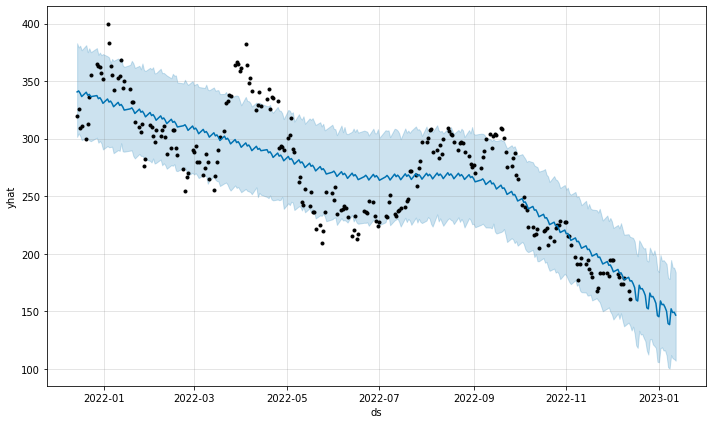

In [ ]:
figure = m.plot(forecast, xlabel='ds', ylabel='yhat')

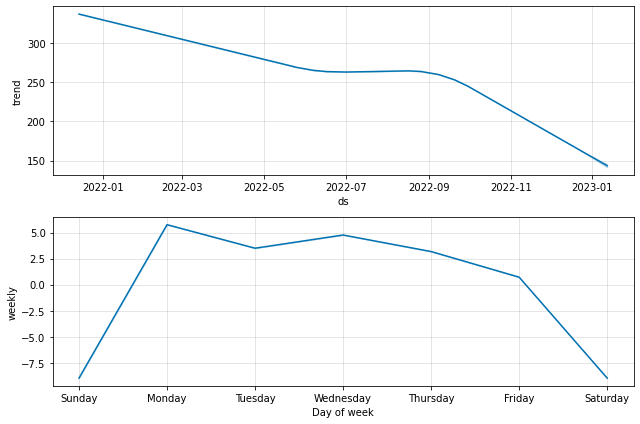

In [ ]:
figure2 = m.plot_components(forecast)

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')

In [ ]:
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We are going to use google sheets for evaluation

In [ ]:
/content/forecast.csv